In [3]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

#importing fashion MNIST dataset and splitting data into training and test data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Labelling Each class relative to each number in the list e.g 0 to 9 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']





2.3.0
4423680/4422102 [==============================] - 0s 0us/step


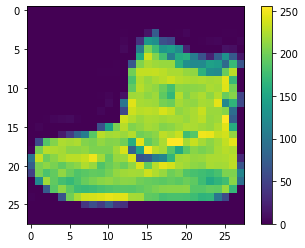

In [4]:
#showing most data is in range of 0-255 but just needs to be greyscale for ease of computation
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Hence divide all data by 255 for pre-processing

train_images = train_images / 255

test_images = test_images / 255

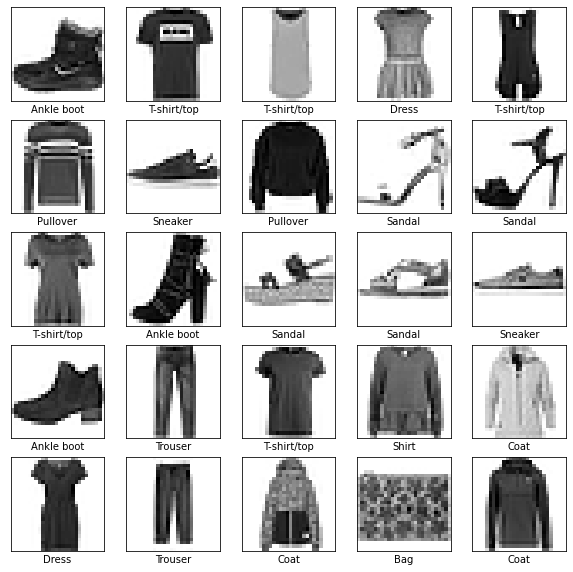

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
#Build the model with flatten layer (makes images 1D) and dense layers from 128 to 10 (10 classes) to identify the objects class
#Dense layer parameters are generated during training
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
#The model then needs to be compiled in order to set the metrics, optimizer algorithm and the loss function to measure during
#back propagation

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
#Fit the model to the train data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0720 - accuracy: 0.6729
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6323 - accuracy: 0.7717
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5595 - accuracy: 0.8000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5184 - accuracy: 0.8174
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4914 - accuracy: 0.8265
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4724 - accuracy: 0.8335
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4577 - accuracy: 0.8396
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4457 - accuracy: 0.8435
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4357 - accuracy: 0.8469
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.427

In [20]:
#Test the accuracy of the model on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4571 - accuracy: 0.8370

Test accuracy: 0.8370000123977661


In [21]:
#Attach a Softmax layer to the models output (logits) to make the probabilities easier to interpret
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
#Predict the probability of class for each of the test images
predictions = probability_model.predict(test_images)

In [23]:
#Look at the probability of first image class displayed as a array of probabilties for each of the 10 classes
predictions[0]

array([6.1931439e-07, 1.7566688e-08, 4.2207103e-06, 6.1440028e-06,
       8.8486968e-06, 2.1981275e-01, 2.3541299e-05, 2.6510280e-01,
       5.5489689e-03, 5.0949204e-01], dtype=float32)

In [24]:
#See which class has the highest confidence value
np.argmax(predictions[0])

9

In [25]:
#Define functions to graph the predictions across the 10 classes
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

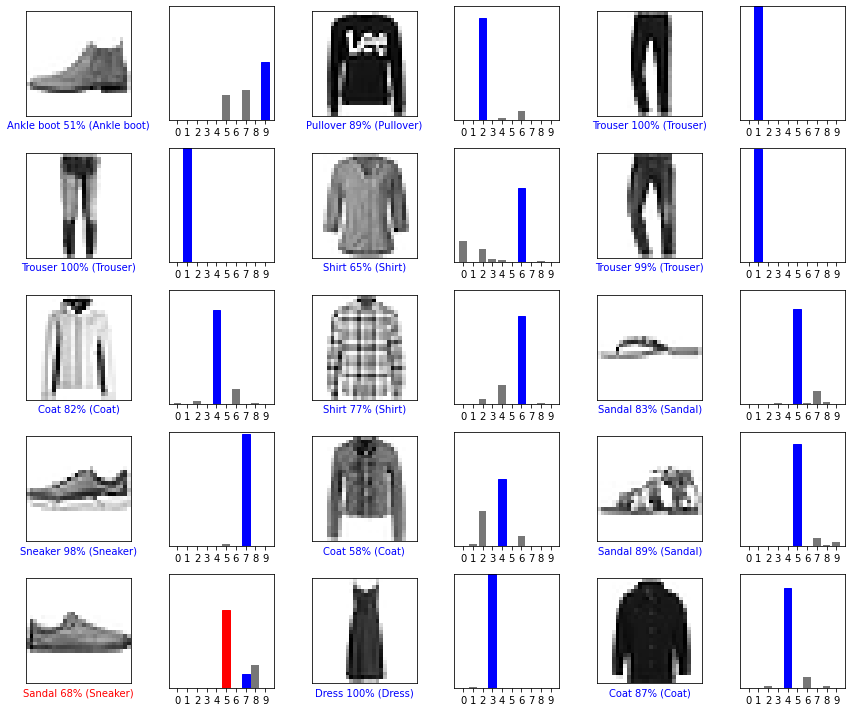

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(1, 28, 28)
[[8.2387042e-01 4.3140206e-04 1.4980797e-02 1.8157674e-02 1.7992245e-03
  2.3236103e-06 1.3911468e-01 6.4645754e-08 1.6425907e-03 9.3738919e-07]]


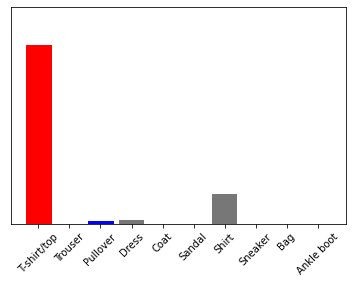

In [34]:
#Grab an image and test the prediction
img = test_images[35]
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#The image in 35 is predicted to be a t shirt/top with a high probability when it's actually a shirt